In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import librosa.display
import librosa
import matplotlib.pyplot as plt
import IPython.display as dsp

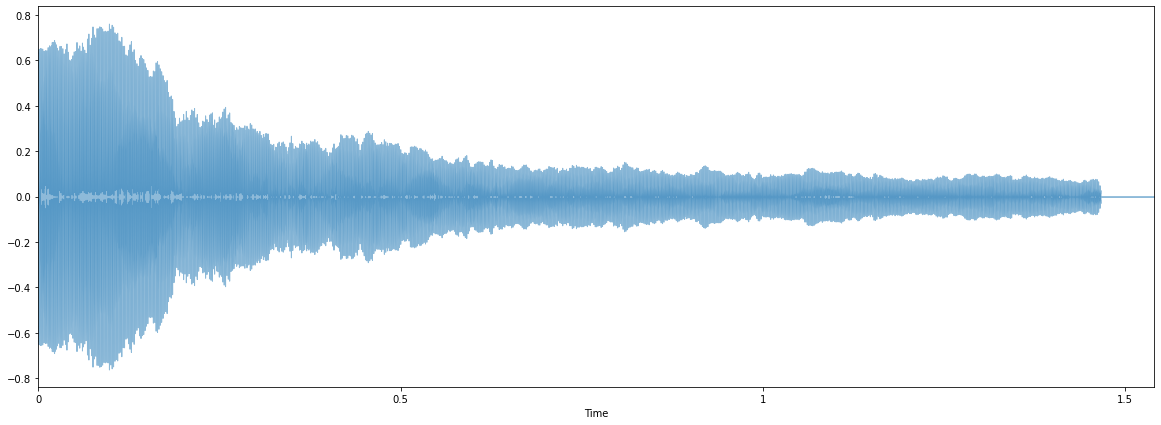

In [5]:
file = 'Instruments/piano_c.wav'
data,sr = librosa.load(file)
plt.figure(figsize = (20,7))
librosa.display.waveplot(data,alpha = 0.5)

In [27]:
def freq_to_mel(freq):
    mel = 2595*np.log10((1+freq/700))
    return mel
def mel_to_freq(mel):
    freq = 700*(np.power(10,mel/2595) - 1)
    return freq

In [22]:
FRAME_SIZE = 512
HOP_LENGTH = 128
stft = librosa.stft(data,n_fft=FRAME_SIZE,hop_length=HOP_LENGTH)
db_scale = librosa.amplitude_to_db(stft)

In [35]:
MEL_BANDS = 128
MAX_FREQ = sr/2
MIN_FREQ = 0
MAX_MEL = freq_to_mel(MAX_FREQ)
MIN_MEL = freq_to_mel(MIN_FREQ)
bands_mel = np.linspace(MIN_MEL,MAX_MEL,MEL_BANDS + 2) # + 2 to exclude endpoints
bands_freq = mel_to_freq(bands_mel)
bins = np.floor((FRAME_SIZE + 1)*bands_freq/sr)

In [37]:
bins

array([  0.,   0.,   0.,   1.,   1.,   1.,   2.,   2.,   3.,   3.,   3.,
         4.,   4.,   5.,   5.,   6.,   6.,   7.,   7.,   8.,   8.,   9.,
        10.,  10.,  11.,  11.,  12.,  13.,  13.,  14.,  15.,  15.,  16.,
        17.,  17.,  18.,  19.,  20.,  21.,  21.,  22.,  23.,  24.,  25.,
        26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
        37.,  39.,  40.,  41.,  42.,  44.,  45.,  46.,  48.,  49.,  51.,
        52.,  54.,  55.,  57.,  58.,  60.,  62.,  63.,  65.,  67.,  69.,
        71.,  73.,  75.,  77.,  79.,  81.,  83.,  85.,  88.,  90.,  92.,
        95.,  97., 100., 102., 105., 107., 110., 113., 116., 119., 122.,
       125., 128., 131., 134., 138., 141., 145., 148., 152., 156., 159.,
       163., 167., 171., 176., 180., 184., 189., 193., 198., 202., 207.,
       212., 217., 222., 228., 233., 239., 244., 250., 256.])

In [50]:
filter_banks = librosa.filters.mel(n_fft=FRAME_SIZE,n_mels = 5,sr = sr)

In [51]:
filter_banks.shape

(5, 257)

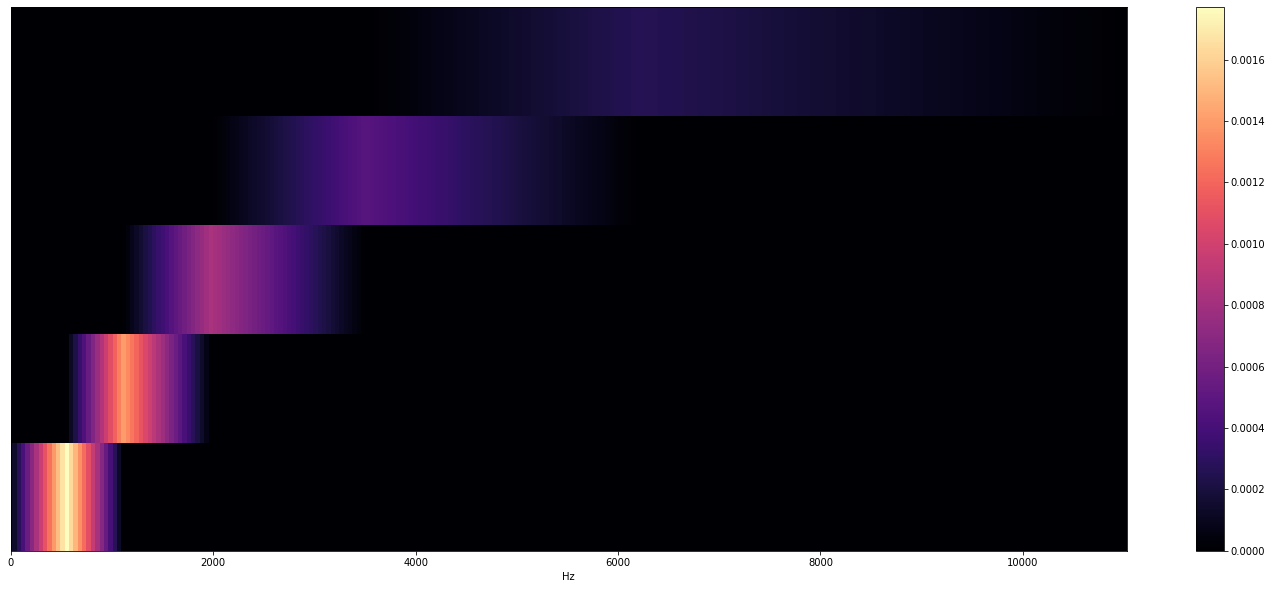

In [52]:
plt.figure(figsize=(25,10))
librosa.display.specshow(filter_banks,
                        sr=sr,
                        x_axis='linear')
plt.colorbar()
plt.show()

In [56]:
mel_spectrogram = librosa.feature.melspectrogram(data,sr = sr,n_fft = FRAME_SIZE,hop_length = HOP_LENGTH,n_mels = 90)
mel_spectrogram.shape

(90, 266)

In [57]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

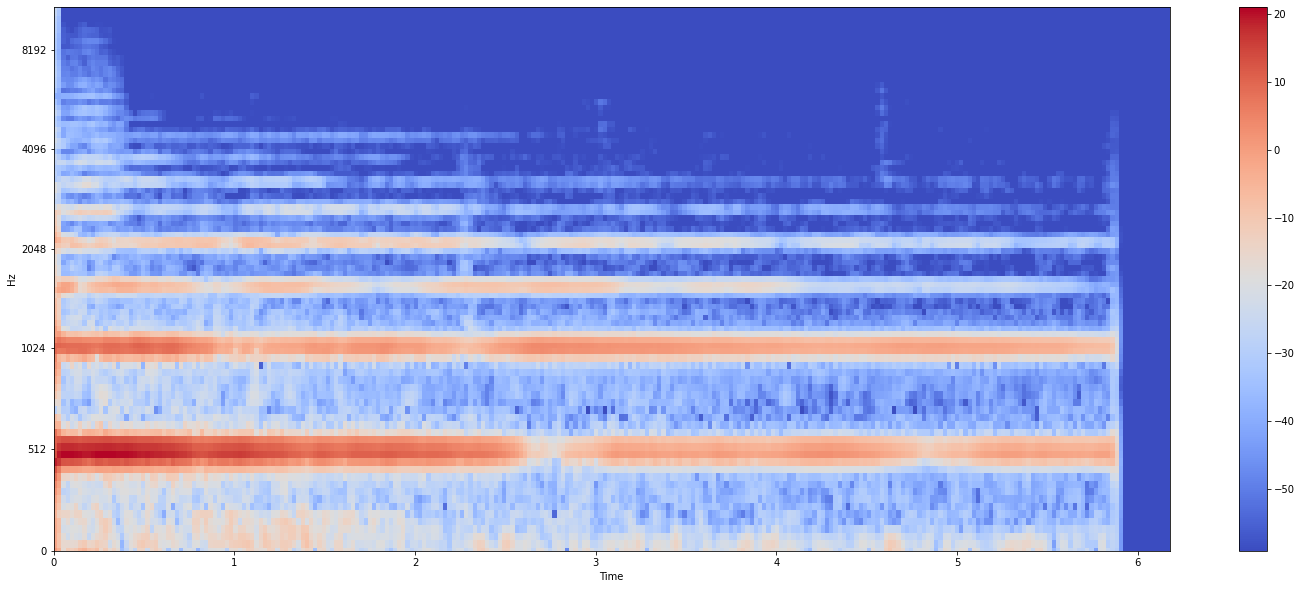

In [58]:
plt.figure(figsize = (25,10))
librosa.display.specshow(log_mel_spectrogram,
                        sr = sr,
                        x_axis='time',
                        y_axis='mel',
                        )
plt.colorbar()
plt.show()